In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
data = pd.read_csv('virtual_matches_data.csv')

In [137]:
data.head()

,date,hour,home_team,away_team,score,home_goals,away_goals,datetime,odds_1,result,over_under_25,odds_over_under_25,goal_no_goal,odds_goal_no_goal
0,14-05-2025,15:34:00,Inghilterra,Messico,0-1,0,1,2025-05-14 15:34:00,250,2,"Under 2,5 Goal",129,NG,137
1,14-05-2025,15:28:00,Francia,Olanda,1-1,1,1,2025-05-14 15:28:00,319,X,"Under 2,5 Goal",129,GG,225
2,14-05-2025,15:22:00,Danimarca,Germania,0-1,0,1,2025-05-14 15:22:00,223,2,"Under 2,5 Goal",130,NG,138
3,14-05-2025,15:16:00,Croazia,Spagna,2-2,2,2,2025-05-14 15:16:00,323,X,"Over 2,5 Goal",247,GG,221
4,14-05-2025,15:10:00,Cile,Francia,1-0,1,0,2025-05-14 15:10:00,228,1,"Under 2,5 Goal",130,NG,138


In [138]:
export_model = data.head(50)
export_model.to_csv('export_model.csv', index=False)

In [139]:

export_model.columns.to_list()

['date',
 'hour',
 'home_team',
 'away_team',
 'score',
 'home_goals',
 'away_goals',
 'datetime',
 'odds_1',
 'result',
 'over_under_25',
 'odds_over_under_25',
 'goal_no_goal',
 'odds_goal_no_goal']

In [140]:
data.result.value_counts(normalize=True)

result
2    0.372897
1    0.355967
X    0.271136
Name: proportion, dtype: float64

Let's analyze the distances between draws (matches with result 'X') and create a table showing:
1. The distribution of games between consecutive draws in specified ranges
2. Calculate percentages and cumulative percentages for each range

In [141]:
# Find indices where result is 'X' (draws)
draw_indices = data[data['result'] == 'X'].index

# Calculate distances between consecutive draws
distances = np.diff(draw_indices)

# Define the ranges for analysis
bins = [0, 1, 3, 5, 7, 10, 12, 15, float('inf')]
labels = ['0-1', '1-3', '3-5', '5-7', '7-10', '10-12', '12-15', '15+']

# Create distribution table
dist_df = pd.DataFrame({
    'Range': labels,
    'Count': pd.cut(distances, bins=bins, labels=labels).value_counts(),
})

# Calculate percentages and cumulative percentages
total = dist_df['Count'].sum()
dist_df['Percentage'] = (dist_df['Count'] / total * 100).round()
dist_df['Cumulative %'] = dist_df['Percentage'].cumsum().round()

# Sort by the ranges in original order
dist_df = dist_df.reindex(labels)
dist_df

,Range,Count,Percentage,Cumulative %
0-1,0-1,1974,26.0,26.0
1-3,1-3,2634,35.0,61.0
3-5,3-5,1414,19.0,80.0
5-7,5-7,704,9.0,89.0
7-10,7-10,505,7.0,96.0
10-12,10-12,152,2.0,98.0
12-15,12-15,90,1.0,99.0
15+,15+,69,1.0,100.0


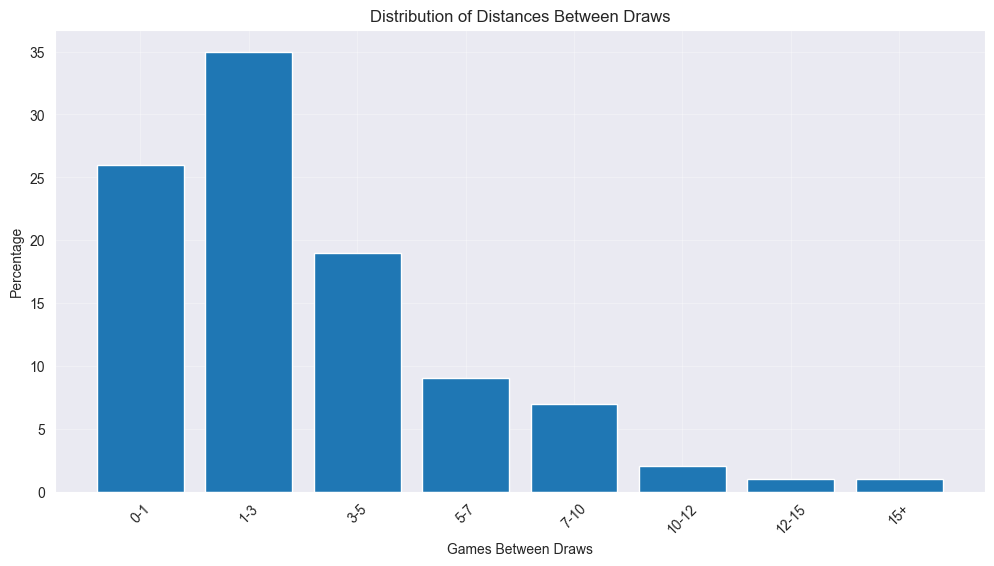

In [142]:
# Visualize the distribution
plt.figure(figsize=(12, 6))
plt.bar(dist_df.index, dist_df['Percentage'])
plt.title('Distribution of Distances Between Draws')
plt.xlabel('Games Between Draws')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


In [143]:
data.head()

,date,hour,home_team,away_team,score,home_goals,away_goals,datetime,odds_1,result,over_under_25,odds_over_under_25,goal_no_goal,odds_goal_no_goal
0,14-05-2025,15:34:00,Inghilterra,Messico,0-1,0,1,2025-05-14 15:34:00,250,2,"Under 2,5 Goal",129,NG,137
1,14-05-2025,15:28:00,Francia,Olanda,1-1,1,1,2025-05-14 15:28:00,319,X,"Under 2,5 Goal",129,GG,225
2,14-05-2025,15:22:00,Danimarca,Germania,0-1,0,1,2025-05-14 15:22:00,223,2,"Under 2,5 Goal",130,NG,138
3,14-05-2025,15:16:00,Croazia,Spagna,2-2,2,2,2025-05-14 15:16:00,323,X,"Over 2,5 Goal",247,GG,221
4,14-05-2025,15:10:00,Cile,Francia,1-0,1,0,2025-05-14 15:10:00,228,1,"Under 2,5 Goal",130,NG,138


In [144]:
import itertools

# Analisi strategia ottimizzata con gestione errori e metriche aggiuntive
try:
    # Calcolo statistiche squadre
    team_stats = pd.DataFrame(index=data['home_team'].unique())

    for team in team_stats.index:
        home_matches = data[data['home_team'] == team]
        away_matches = data[data['away_team'] == team]

        draw_rate_home = (home_matches['result'] == 'X').mean()
        draw_rate_away = (away_matches['result'] == 'X').mean()
        total_matches = len(home_matches) + len(away_matches)
        avg_odds = home_matches['odds_1'].mean()

        # Calcolo metriche aggiuntive
        draw_streak_home = max([len(list(g)) for k, g in itertools.groupby(home_matches['result']) if k == 'X'] or [0])
        draw_streak_away = max([len(list(g)) for k, g in itertools.groupby(away_matches['result']) if k == 'X'] or [0])

        team_stats.loc[team, 'draw_rate_home'] = draw_rate_home
        team_stats.loc[team, 'draw_rate_away'] = draw_rate_away
        team_stats.loc[team, 'total_matches'] = total_matches
        team_stats.loc[team, 'avg_odds'] = avg_odds
        team_stats.loc[team, 'max_draw_streak'] = max(draw_streak_home, draw_streak_away)

    # Analisi sequenze e pattern
    no_draw_streaks = []
    current_streak = 0
    hourly_stats = {}

    for idx, row in data.iterrows():
        hour = int(row['hour'].split(':')[0])
        if hour not in hourly_stats:
            hourly_stats[hour] = {'total': 0, 'draws': 0}
        hourly_stats[hour]['total'] += 1
        if row['result'] == 'X':
            hourly_stats[hour]['draws'] += 1
            if current_streak > 0:
                no_draw_streaks.append(current_streak)
            current_streak = 0
        else:
            current_streak += 1

    if current_streak > 0:
        no_draw_streaks.append(current_streak)

    streak_stats = pd.Series(no_draw_streaks).value_counts().sort_index()

    # Calcolo probabilità dopo serie negative
    prob_after_streak = {}
    for streak_length in range(1, 11):
        matches_after_streak = len([x for x in no_draw_streaks if x >= streak_length])
        draws_after_streak = sum(1 for x in no_draw_streaks if x == streak_length)
        if matches_after_streak > 0:
            prob_after_streak[streak_length] = draws_after_streak / matches_after_streak

    # Analisi oraria
    hourly_draw_rates = {hour: stats['draws'] / stats['total']
                         for hour, stats in hourly_stats.items()}

    print("\n=== Analisi Dettagliata Avanzata ===")
    print("\nSquadre con maggiore probabilità di pareggio (home):")
    print(team_stats.sort_values('draw_rate_home', ascending=False).head())

    print("\nDistribuzione serie senza pareggi:")
    print(streak_stats.head(10))

    print("\nProbabilità pareggio dopo serie negative:")
    for streak, prob in prob_after_streak.items():
        print(f"Dopo {streak} partite: {prob:.2%}")

    print("\nOrari con maggiore probabilità di pareggio:")
    sorted_hours = sorted(hourly_draw_rates.items(), key=lambda x: x[1], reverse=True)
    for hour, rate in sorted_hours[:5]:
        print(f"Ora {hour:02d}:00 - {rate:.2%}")

    print("\nStrategia Ottimizzata:")
    print("1. Puntata base: 5€")
    print("2. Attendi 3-4 partite senza X")
    print("3. Verifica squadre con draw_rate > 27%")
    print("4. Massimo 2 raddoppi")
    print("5. Stop loss: -20€")
    print("6. Take profit: +15€")
    print("7. Pausa di 1 partita dopo ogni puntata")
    print("8. Privilegia orari con alta % di X")
    print("9. Evita squadre in serie positiva > 2 vittorie")
    print("10. Raddoppia solo se odds > 3.0")

except Exception as e:
    print(f"Errore nell'analisi: {str(e)}")



=== Analisi Dettagliata Avanzata ===

Squadre con maggiore probabilità di pareggio (home):
          draw_rate_home  draw_rate_away  total_matches    avg_odds  \
Belgio          0.317647        0.272222         1795.0  258.305882   
Italia          0.283591        0.261281         3410.0  256.580186   
Brasile         0.279279        0.289694         2690.0  255.724153   
Olanda          0.276952        0.269494         3410.0  257.321561   
Colombia        0.274325        0.334262         2692.0  254.759537   

          max_draw_streak  
Belgio                6.0  
Italia                6.0  
Brasile               6.0  
Olanda                5.0  
Colombia              6.0  

Distribuzione serie senza pareggi:
1     1540
2     1095
3      824
4      590
5      402
6      302
7      221
8      160
9      124
10      91
Name: count, dtype: int64

Probabilità pareggio dopo serie negative:
Dopo 1 partite: 27.65%
Dopo 2 partite: 27.18%
Dopo 3 partite: 28.08%
Dopo 4 partite: 27.96%
Dopo 5

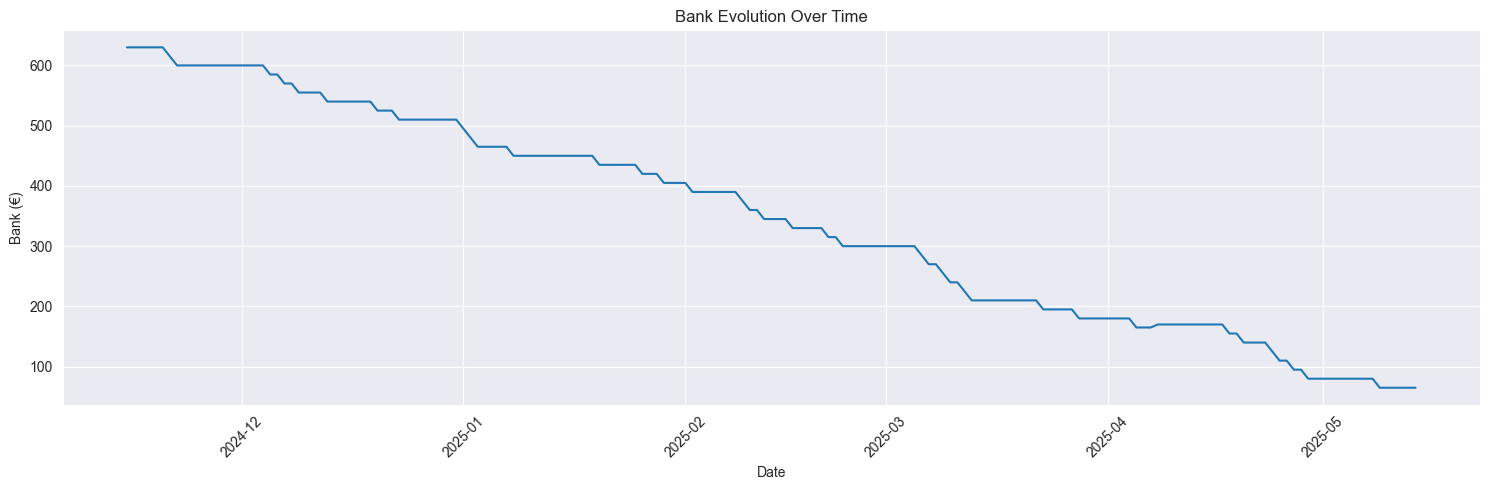


=== Simulation Results ===
Initial Bank: 50
Final Bank: 630
Total Profit: 580
Total Days: 181
Profitable Days: 39
Average Daily Profit: 3.20€
Max Daily Profit: 15
Max Daily Loss: -5
Max Bank: 630
Min Bank: 65


In [147]:
def simulate_betting_strategy(data, initial_bank=50, base_bet=5, max_doubles=2,
                              min_wait_games=3, max_wait_games=4, min_draw_rate=0.27,
                              stop_loss=-20, take_profit=15):
    results = []
    bank = initial_bank
    daily_profits = []
    current_day = None
    daily_profit = 0
    waiting_games = 0
    current_bet = base_bet
    doubles_count = 0

    # Calculate team stats
    team_stats = {}
    for team in set(data['home_team'].unique()) | set(data['away_team'].unique()):
        home_matches = data[data['home_team'] == team]
        away_matches = data[data['away_team'] == team]

        draw_rate_home = (home_matches['result'] == 'X').mean()
        draw_rate_away = (away_matches['result'] == 'X').mean()

        team_stats[team] = {
            'draw_rate_home': draw_rate_home if not pd.isna(draw_rate_home) else 0,
            'draw_rate_away': draw_rate_away if not pd.isna(draw_rate_away) else 0
        }

    # Convert date to datetime
    data['datetime'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

    for idx, match in data.iterrows():
        match_date = match['datetime'].date()

        # Track daily profits
        if current_day is None:
            current_day = match_date
        elif current_day != match_date:
            daily_profits.append({'date': current_day, 'profit': daily_profit, 'final_bank': bank})
            daily_profit = 0
            current_day = match_date
            waiting_games = 0
            current_bet = base_bet
            doubles_count = 0

        # Check if we should reset after reaching stop loss or take profit
        if daily_profit <= stop_loss or daily_profit >= take_profit:
            waiting_games = 0
            current_bet = base_bet
            doubles_count = 0
            continue

        # Increment waiting counter
        waiting_games += 1

        # Check betting conditions
        home_team = match['home_team']
        away_team = match['away_team']

        home_draw_rate = team_stats[home_team]['draw_rate_home']
        away_draw_rate = team_stats[away_team]['draw_rate_away']

        conditions_met = (
                waiting_games >= min_wait_games and
                waiting_games <= max_wait_games and
                (home_draw_rate > min_draw_rate or away_draw_rate > min_draw_rate) and
                match['odds_1'] > 300  # odds > 3.0
        )

        if conditions_met:
            results.append({
                'date': match_date,
                'hour': match['hour'],
                'teams': f"{match['home_team']} vs {match['away_team']}",
                'bet': current_bet,
                'result': match['result'],
                'bank_before': bank,
                'daily_profit_before': daily_profit
            })

            if match['result'] == 'X':  # Win
                profit = current_bet * 3  # Assuming X odds around 3.0
                bank += profit
                daily_profit += profit
                current_bet = base_bet
                doubles_count = 0
            else:  # Loss
                bank -= current_bet
                daily_profit -= current_bet
                if doubles_count < max_doubles:
                    current_bet *= 2
                    doubles_count += 1
                else:
                    current_bet = base_bet
                    doubles_count = 0

            results[-1].update({
                'bank_after': bank,
                'daily_profit_after': daily_profit
            })

            waiting_games = 0

    # Add last day
    if current_day is not None:
        daily_profits.append({'date': current_day, 'profit': daily_profit, 'final_bank': bank})

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    daily_profits_df = pd.DataFrame(daily_profits)

    # Calculate statistics
    stats = {
        'Initial Bank': initial_bank,
        'Final Bank': bank,
        'Total Profit': bank - initial_bank,
        'Total Days': len(daily_profits_df),
        'Profitable Days': len(daily_profits_df[daily_profits_df['profit'] > 0]),
        'Average Daily Profit': daily_profits_df['profit'].mean(),
        'Max Daily Profit': daily_profits_df['profit'].max(),
        'Max Daily Loss': daily_profits_df['profit'].min(),
        'Max Bank': daily_profits_df['final_bank'].max(),
        'Min Bank': daily_profits_df['final_bank'].min()
    }

    # Plotting
    plt.figure(figsize=(15, 5))
    plt.plot(daily_profits_df['date'], daily_profits_df['final_bank'])
    plt.title('Bank Evolution Over Time')
    plt.xlabel('Date')
    plt.ylabel('Bank (€)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Print statistics
    print("\n=== Simulation Results ===")
    for key, value in stats.items():
        print(f"{key}: {value:.2f}€" if isinstance(value, float) else f"{key}: {value}")

    return results_df, daily_profits_df, stats


# Run simulation
results_df, daily_profits_df, stats = simulate_betting_strategy(data)


Ottimizzazione della Soglia per la Regola Euristica basata su 'odds_1'

Valori di 'odds_1' *sempre* associati a un pareggio (23 valori).
Valori di 'odds_1' *a volte* associati a un pareggio (3 valori).

--- Risultati Ottimizzazione Soglia (massimizzando F1-Score per Pareggio) ---
Miglior Soglia P(Draw) trovata: 0.05
  Miglior F1-Score Pareggio: 0.9905
  Precision Pareggio (alla miglior soglia): 0.9811
  Recall Pareggio (alla miglior soglia): 1.0000
  TP (Pareggi Corretti): 7543
  FN (Pareggi Mancati): 0
  FP (Falsi Allarmi): 145
  TN (Non-Pareggi Corretti): 20132


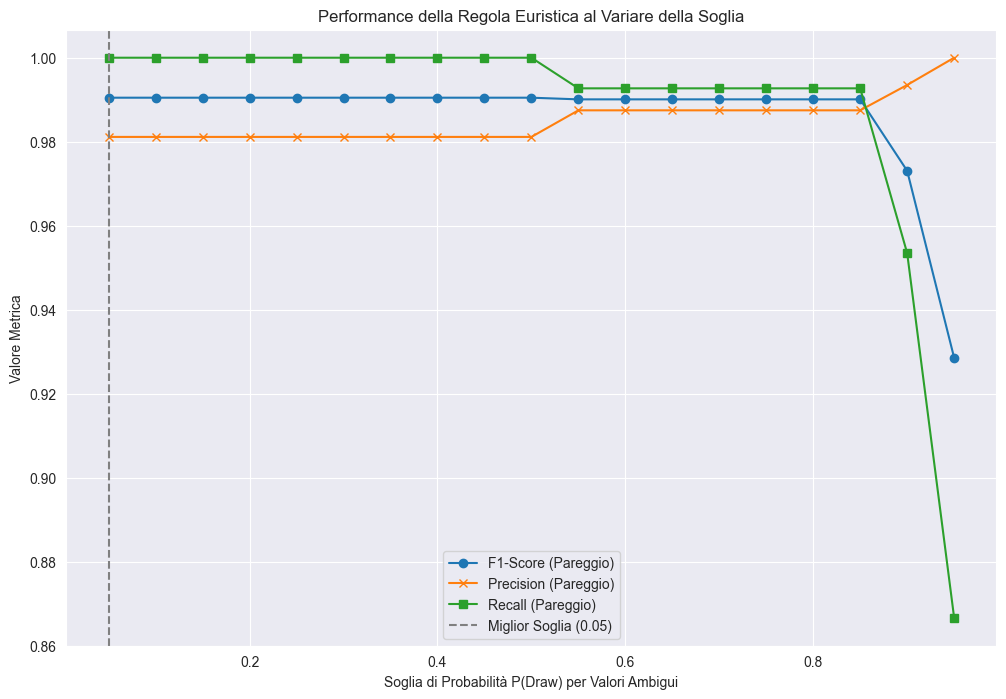


--- Valutazione della Regola Euristica con Soglia Ottimale P(Draw) > 0.05 ---

Matrice di Confusione (Regola Euristica Ottimale):
[[20132   145]
 [    0  7543]]

  Pareggi effettivi previsti correttamente (TP): 7543
  Pareggi effettivi previsti erroneamente come 'Non Pareggio' (FN - Pareggi Mancati): 0
  Non-pareggi effettivi previsti erroneamente come 'Pareggio' (FP - Falsi Allarmi): 145
  Non-pareggi effettivi previsti correttamente (TN): 20132

Classification Report (Regola Euristica Ottimale):
                  precision    recall  f1-score   support

Non Pareggio (0)       1.00      0.99      1.00     20277
    Pareggio (1)       0.98      1.00      0.99      7543

        accuracy                           0.99     27820
       macro avg       0.99      1.00      0.99     27820
    weighted avg       0.99      0.99      0.99     27820


Numero di Falsi Positivi (Regola Ottimale): 145
Valori di 'odds_1' per i Falsi Positivi della Regola Ottimale (primi 10):
odds_1
310    50
312  

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

# Carica il dataset
try:
    df = pd.read_csv('virtual_matches_data.csv')
except FileNotFoundError:
    print("Errore: Il file 'virtual_matches_data.csv' non è stato trovato.")
    exit()

# --- Ricrea 'original_result' e 'is_draw' come nello script del modello ---
if 'home_goals' in df.columns and 'away_goals' in df.columns:
    def determine_original_result(row):
        if pd.isna(row['home_goals']) or pd.isna(row['away_goals']):
            return np.nan
        if row['home_goals'] > row['away_goals']:
            return '1'
        elif row['home_goals'] < row['away_goals']:
            return '2'
        else:
            return 'X'
    df['original_result'] = df.apply(determine_original_result, axis=1)
    df.dropna(subset=['original_result'], inplace=True)
    df['is_draw'] = df['original_result'].apply(lambda x: 1 if x == 'X' else 0)
else:
    print("Errore: Colonne 'home_goals' o 'away_goals' mancanti.")
    exit()

if 'odds_1' not in df.columns:
    print("Errore: La colonna 'odds_1' non è presente.")
    exit()

print("Ottimizzazione della Soglia per la Regola Euristica basata su 'odds_1'\n")

# --- 1. Identificazione dei Valori di odds_1 (come nello script precedente) ---
all_odds_values = df['odds_1'].unique()
consistent_draw_odds = []
ambiguous_odds_info = {}

for val in sorted(all_odds_values):
    draw_count = df[(df['odds_1'] == val) & (df['is_draw'] == 1)].shape[0]
    non_draw_count = df[(df['odds_1'] == val) & (df['is_draw'] == 0)].shape[0]

    if draw_count > 0 and non_draw_count == 0:
        consistent_draw_odds.append(val)
    elif draw_count > 0 and non_draw_count > 0:
        total_count = draw_count + non_draw_count
        draw_probability = draw_count / total_count
        ambiguous_odds_info[val] = {
            'draw_count': draw_count,
            'non_draw_count': non_draw_count,
            'total_count': total_count,
            'draw_probability': draw_probability
        }
consistent_draw_odds.sort() # Assicura che la lista sia ordinata

print(f"Valori di 'odds_1' *sempre* associati a un pareggio ({len(consistent_draw_odds)} valori).")
# print(consistent_draw_odds) # Deselezionare per vedere la lista completa
print(f"Valori di 'odds_1' *a volte* associati a un pareggio ({len(ambiguous_odds_info)} valori).")
# for val, info in sorted(ambiguous_odds_info.items()):
#     print(f"  odds_1 = {val}: P(Draw) = {info['draw_probability']:.2f} ({info['draw_count']}D / {info['non_draw_count']}ND)")


# --- 2. Ottimizzazione della Soglia di Probabilità per la Regola Euristica ---
thresholds_to_test = np.arange(0.05, 1.0, 0.05) # Testiamo soglie da 0.05 a 0.95
best_f1_draw = -1
best_threshold = -1
best_metrics = {}
results_by_threshold = []

y_true = df['is_draw']

for current_threshold in thresholds_to_test:
    def predict_draw_heuristic_dynamic(odds_1_value, threshold):
        if odds_1_value in consistent_draw_odds:
            return 1
        elif odds_1_value in ambiguous_odds_info:
            if ambiguous_odds_info[odds_1_value]['draw_probability'] > threshold:
                return 1
            else:
                return 0
        else:
            return 0

    df['heuristic_prediction'] = df['odds_1'].apply(lambda x: predict_draw_heuristic_dynamic(x, current_threshold))
    y_pred_heuristic = df['heuristic_prediction']

    f1_draw = f1_score(y_true, y_pred_heuristic, pos_label=1, zero_division=0)
    precision_draw = precision_score(y_true, y_pred_heuristic, pos_label=1, zero_division=0)
    recall_draw = recall_score(y_true, y_pred_heuristic, pos_label=1, zero_division=0)

    cm = confusion_matrix(y_true, y_pred_heuristic)
    if cm.shape == (2,2): # Assicura che ci siano entrambe le classi nelle predizioni per un unpacking sicuro
        TN, FP, FN, TP = cm.ravel()
    else: # Gestione semplificata se una classe non è predetta (improbabile con auto_class_weights)
        # Questo è un fallback, la logica di estrazione potrebbe necessitare di aggiustamenti
        # a seconda di come sklearn costruisce la cm con classi mancanti
        TP = cm[1,1] if cm.shape == (2,2) else np.sum((y_true==1) & (y_pred_heuristic==1))
        FN = np.sum((y_true==1) & (y_pred_heuristic==0))
        FP = np.sum((y_true==0) & (y_pred_heuristic==1))
        TN = np.sum((y_true==0) & (y_pred_heuristic==0))


    results_by_threshold.append({
        'threshold': current_threshold,
        'f1_draw': f1_draw,
        'precision_draw': precision_draw,
        'recall_draw': recall_draw,
        'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN
    })

    if f1_draw > best_f1_draw:
        best_f1_draw = f1_draw
        best_threshold = current_threshold
        best_metrics = results_by_threshold[-1] # Salva l'intero dizionario delle metriche

print("\n--- Risultati Ottimizzazione Soglia (massimizzando F1-Score per Pareggio) ---")
print(f"Miglior Soglia P(Draw) trovata: {best_threshold:.2f}")
print(f"  Miglior F1-Score Pareggio: {best_metrics['f1_draw']:.4f}")
print(f"  Precision Pareggio (alla miglior soglia): {best_metrics['precision_draw']:.4f}")
print(f"  Recall Pareggio (alla miglior soglia): {best_metrics['recall_draw']:.4f}")
print(f"  TP (Pareggi Corretti): {best_metrics['TP']}")
print(f"  FN (Pareggi Mancati): {best_metrics['FN']}")
print(f"  FP (Falsi Allarmi): {best_metrics['FP']}")
print(f"  TN (Non-Pareggi Corretti): {best_metrics['TN']}")

# Visualizzazione delle metriche al variare della soglia
results_df = pd.DataFrame(results_by_threshold)
plt.figure(figsize=(12, 8))
plt.plot(results_df['threshold'], results_df['f1_draw'], marker='o', label='F1-Score (Pareggio)')
plt.plot(results_df['threshold'], results_df['precision_draw'], marker='x', label='Precision (Pareggio)')
plt.plot(results_df['threshold'], results_df['recall_draw'], marker='s', label='Recall (Pareggio)')
plt.axvline(x=best_threshold, color='grey', linestyle='--', label=f'Miglior Soglia ({best_threshold:.2f})')
plt.xlabel("Soglia di Probabilità P(Draw) per Valori Ambigui")
plt.ylabel("Valore Metrica")
plt.title("Performance della Regola Euristica al Variare della Soglia")
plt.legend()
plt.grid(True)
plt.show()


# --- 3. Analisi Dettagliata con la Soglia Ottimale ---
OPTIMAL_THRESHOLD = best_threshold
df['optimal_heuristic_prediction'] = df['odds_1'].apply(lambda x: predict_draw_heuristic_dynamic(x, OPTIMAL_THRESHOLD))
y_pred_optimal_heuristic = df['optimal_heuristic_prediction']

print(f"\n--- Valutazione della Regola Euristica con Soglia Ottimale P(Draw) > {OPTIMAL_THRESHOLD:.2f} ---")
print("\nMatrice di Confusione (Regola Euristica Ottimale):")
# Ricalcola la matrice di confusione con la soglia ottimale per coerenza, anche se già in best_metrics
conf_matrix_optimal = confusion_matrix(y_true, y_pred_optimal_heuristic)
print(conf_matrix_optimal)
if conf_matrix_optimal.shape == (2,2):
    TN_opt, FP_opt, FN_opt, TP_opt = conf_matrix_optimal.ravel()
    print(f"\n  Pareggi effettivi previsti correttamente (TP): {TP_opt}")
    print(f"  Pareggi effettivi previsti erroneamente come 'Non Pareggio' (FN - Pareggi Mancati): {FN_opt}")
    print(f"  Non-pareggi effettivi previsti erroneamente come 'Pareggio' (FP - Falsi Allarmi): {FP_opt}")
    print(f"  Non-pareggi effettivi previsti correttamente (TN): {TN_opt}")

print("\nClassification Report (Regola Euristica Ottimale):")
print(classification_report(y_true, y_pred_optimal_heuristic, target_names=['Non Pareggio (0)', 'Pareggio (1)'], zero_division=0))

# Analisi dei Falsi Positivi e Negativi per la regola ottimale
fp_optimal_heuristic_df = df[(df['optimal_heuristic_prediction'] == 1) & (df['is_draw'] == 0)]
print(f"\nNumero di Falsi Positivi (Regola Ottimale): {fp_optimal_heuristic_df.shape[0]}")
if not fp_optimal_heuristic_df.empty:
    print("Valori di 'odds_1' per i Falsi Positivi della Regola Ottimale (primi 10):")
    print(fp_optimal_heuristic_df['odds_1'].value_counts().head(10))

fn_optimal_heuristic_df = df[(df['optimal_heuristic_prediction'] == 0) & (df['is_draw'] == 1)]
print(f"\nNumero di Falsi Negativi (Regola Ottimale): {fn_optimal_heuristic_df.shape[0]}")
if not fn_optimal_heuristic_df.empty:
    print("Valori di 'odds_1' per i Falsi Negativi della Regola Ottimale (primi 10):")
    print(fn_optimal_heuristic_df['odds_1'].value_counts().head(10))


# --- 4. Confronto Finale con il Modello CatBoost ---
print("\n--- Confronto Finale con il Modello CatBoost (solo odds_1) ---")
print("Il modello CatBoost (con solo odds_1) aveva riportato (dal tuo output precedente):")
CATBOOST_FN = 0
CATBOOST_FP = 31 # Basato sul tuo ultimo output per CatBoost con solo odds_1
print(f"  - Pareggi Mancati (FN) CatBoost: {CATBOOST_FN}")
print(f"  - Falsi Allarmi (FP) CatBoost: {CATBOOST_FP}")

print(f"\nLa Regola Euristica Ottimale (Soglia P(Draw) > {OPTIMAL_THRESHOLD:.2f}) ha prodotto:")
if conf_matrix_optimal.shape == (2,2):
    print(f"  - Pareggi Mancati (FN) Regola Ottimale: {FN_opt}")
    print(f"  - Falsi Allarmi (FP) Regola Ottimale: {FP_opt}")
else:
    print("  - Statistiche FN/FP per la regola euristica ottimale non calcolabili direttamente.")


print("\nConsiderazioni:")
print("Se FN (Regola Ottimale) è > FN (CatBoost), la regola euristica manca più pareggi.")
print("Se FP (Regola Ottimale) è > FP (CatBoost), la regola euristica ha più falsi allarmi.")
print("CatBoost, anche con una singola feature, può applicare logiche di splitting più complesse")
print("di una singola soglia di probabilità globale per i valori ambigui, spiegando potenziali differenze.")



In [151]:
import pandas as pd
import numpy as np

# Dati derivati dall'analisi del dataset 'virtual_matches_data.csv'
# Questi valori sono basati sull'output che hai fornito precedentemente.
# Se il tuo dataset cambia o un'analisi più approfondita fornisce valori diversi,
# questi dovrebbero essere aggiornati.

# Valori di odds_1 che sono SEMPRE associati a un pareggio nel dataset analizzato
# (basato sul tuo output: 23 valori, da 302 a 328 con alcune eccezioni)
CONSISTENT_DRAW_ODDS_LIST = [
    302, 303, 305, 306, 307, 308, 309, 311, 313, 314, 315, 316, 317,
    318, 319, 320, 321, 322, 323, 324, 325, 327, 328
]

# Valori di odds_1 che sono A VOLTE associati a un pareggio, con la loro probabilità storica
# (basato sul tuo output)
AMBIGUOUS_ODDS_DATA = {
    310: {'draw_probability': 0.52},  # P(Draw) = 0.52 (55 Pareggi / 50 Non-Pareggi)
    312: {'draw_probability': 0.86},  # P(Draw) = 0.86 (296 Pareggi / 48 Non-Pareggi)
    326: {'draw_probability': 0.93}   # P(Draw) = 0.93 (655 Pareggi / 47 Non-Pareggi)
}

def predici_pareggio_con_regola(odds_1_value, optimal_probability_threshold):
    """
    Predice se una partita finirà in pareggio (1) o no (0)
    basandosi sul valore di odds_1 e una soglia di probabilità ottimale.

    La logica è:
    1. Se odds_1_value è nella lista dei valori che storicamente sono SEMPRE pareggi,
       predice pareggio (1).
    2. Se odds_1_value è nella lista dei valori AMBIGUI:
       a. Se la sua probabilità storica di essere un pareggio è MAGGIORE della
          optimal_probability_threshold, predice pareggio (1).
       b. Altrimenti, predice non-pareggio (0).
    3. Se odds_1_value non rientra in nessuno dei casi precedenti (cioè, storicamente
       non è mai stato un pareggio o è stato solo non-pareggio), predice non-pareggio (0).

    Args:
        odds_1_value (int or float): Il valore della quota odds_1 per la partita.
        optimal_probability_threshold (float): La soglia di probabilità ottimale
                                               determinata dall'analisi precedente
                                               (es. dallo script optimizing_heuristic_threshold_script).
                                               Usata per i valori ambigui di odds_1.
    Returns:
        int: 1 se la predizione è pareggio, 0 altrimenti.
    """
    # Controlla se l'input è un numero valido, altrimenti restituisce 0 (o gestisci l'errore come preferisci)
    if pd.isna(odds_1_value):
        return 0 # O potresti sollevare un'eccezione o restituire np.nan

    try:
        # Assicura che odds_1_value sia un intero per il confronto con le chiavi/liste
        # Questo potrebbe non essere necessario se odds_1 è sempre intero nel tuo df
        current_odds = int(odds_1_value)
    except ValueError:
        # Se odds_1_value non può essere convertito in intero (es. stringa non numerica)
        return 0 # O gestisci l'errore

    if current_odds in CONSISTENT_DRAW_ODDS_LIST:
        return 1  # Caso 1: Sempre pareggio
    elif current_odds in AMBIGUOUS_ODDS_DATA:
        # Caso 2: Valore ambiguo
        if AMBIGUOUS_ODDS_DATA[current_odds]['draw_probability'] > optimal_probability_threshold:
            return 1  # Caso 2a: Abbastanza probabile che sia pareggio
        else:
            return 0  # Caso 2b: Non abbastanza probabile
    else:
        # Caso 3: Storicamente non associato a pareggi (o solo a non-pareggi)
        return 0

# --- Esempio di come utilizzare la funzione con un DataFrame Pandas ---
if __name__ == '__main__':
    # 1. Determina la tua OPTIMAL_PROBABILITY_THRESHOLD
    #    Questa soglia dovrebbe essere il valore 'best_threshold'
    #    ottenuto dall'esecuzione dello script 'optimizing_heuristic_threshold_script.py'.
    #    Per questo esempio, userò un valore ipotetico.
    #    SOSTITUISCI QUESTO VALORE CON LA TUA SOGLIA OTTIMALE!
    #    Ad esempio, se lo script di ottimizzazione ha trovato che 0.65 è la migliore soglia:
    #    OPTIMAL_THRESHOLD = 0.65
    #    Se non hai ancora eseguito l'ottimizzazione, puoi usare 0.80 come punto di partenza
    #    basandoti sulle analisi precedenti, ma l'ottimizzazione è raccomandata.

    # Supponiamo che l'ottimizzazione abbia trovato questa soglia (valore di esempio!)
    OPTIMAL_THRESHOLD_ESEMPIO = 0.60 # <-- SOSTITUISCI CON LA TUA SOGLIA OTTIMALE
    print(f"Utilizzo della soglia di probabilità ottimale (esempio): {OPTIMAL_THRESHOLD_ESEMPIO}\n")

    # 2. Carica il tuo DataFrame (o usa quello già caricato se questo script è parte di un flusso più grande)
    try:
        df_esempio = pd.read_csv('virtual_matches_data.csv')
        # Assicurati che la colonna 'odds_1' esista
        if 'odds_1' not in df_esempio.columns:
            raise ValueError("La colonna 'odds_1' non è presente nel DataFrame.")

        # 3. Applica la funzione per creare una nuova colonna di predizioni
        df_esempio['predizione_pareggio_regola'] = df_esempio['odds_1'].apply(
            lambda x: predici_pareggio_con_regola(x, OPTIMAL_THRESHOLD_ESEMPIO)
        )

        # 4. Mostra le prime righe con la nuova colonna e la distribuzione delle predizioni
        print("Prime righe del DataFrame con la colonna 'predizione_pareggio_regola':")
        print(df_esempio[['odds_1', 'predizione_pareggio_regola']].head(10))

        print("\nDistribuzione delle predizioni della regola:")
        print(df_esempio['predizione_pareggio_regola'].value_counts(normalize=True))

        # (Opzionale) Se hai anche la colonna 'is_draw' reale nel df_esempio, puoi valutare questa regola:
        if 'home_goals' in df_esempio.columns and 'away_goals' in df_esempio.columns:
            def determine_original_result(row):
                if pd.isna(row['home_goals']) or pd.isna(row['away_goals']): return np.nan
                if row['home_goals'] > row['away_goals']: return '1'
                elif row['home_goals'] < row['away_goals']: return '2'
                else: return 'X'
            df_esempio['original_result'] = df_esempio.apply(determine_original_result, axis=1)
            df_esempio.dropna(subset=['original_result'], inplace=True) # Rimuovi righe dove non si può determinare
            df_esempio['is_draw_reale'] = df_esempio['original_result'].apply(lambda x: 1 if x == 'X' else 0)

            # Rimuovi NaN da 'predizione_pareggio_regola' se 'odds_1' aveva NaN e la funzione ha restituito NaN
            # (la versione attuale della funzione restituisce 0 per odds_1 NaN, quindi questo potrebbe non essere necessario)
            # df_esempio.dropna(subset=['predizione_pareggio_regola'], inplace=True)


            # Assicurati che i DataFrame/Series per la valutazione siano allineati e non contengano NaN
            # Questo è un punto critico se ci sono stati dropna selettivi.
            # Per sicurezza, potremmo filtrare il df per le righe dove entrambe le colonne sono valide.
            df_valutazione = df_esempio.dropna(subset=['is_draw_reale', 'predizione_pareggio_regola'])

            print("\nValutazione della Regola Euristica sull'intero dataset (usando la soglia di esempio):")
            if not df_valutazione.empty:
                from sklearn.metrics import classification_report, confusion_matrix
                print(confusion_matrix(df_valutazione['is_draw_reale'], df_valutazione['predizione_pareggio_regola']))
                print(classification_report(df_valutazione['is_draw_reale'], df_valutazione['predizione_pareggio_regola'], zero_division=0))
            else:
                print("Non è possibile valutare la regola perché non ci sono dati validi dopo la gestione dei NaN.")
        else:
            print("\nPer valutare la regola, assicurati che le colonne 'home_goals' e 'away_goals' siano presenti per calcolare 'is_draw_reale'.")


    except FileNotFoundError:
        print("Errore nell'esempio: Il file 'virtual_matches_data.csv' non è stato trovato.")
    except ValueError as ve:
        print(f"Errore nell'esempio: {ve}")
    except Exception as e:
        print(f"Errore imprevisto nell'esempio: {e}")



Utilizzo della soglia di probabilità ottimale (esempio): 0.6

Prime righe del DataFrame con la colonna 'predizione_pareggio_regola':
   odds_1  predizione_pareggio_regola
0     250                           0
1     319                           1
2     223                           0
3     323                           1
4     228                           0
5     289                           0
6     226                           0
7     230                           0
8     268                           0
9     258                           0

Distribuzione delle predizioni della regola:
predizione_pareggio_regola
0    0.727426
1    0.272574
Name: proportion, dtype: float64

Valutazione della Regola Euristica sull'intero dataset (usando la soglia di esempio):
[[20182    95]
 [   55  7488]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20277
           1       0.99      0.99      0.99      7543

    accuracy                     

In [153]:
import pandas as pd
import numpy as np

# Dati derivati dall'analisi del dataset 'virtual_matches_data.csv'
# Questi valori sono basati sull'output che hai fornito precedentemente.
# Se il tuo dataset 'data' attuale è diverso, questi valori potrebbero
# necessitare di un aggiornamento basato su una nuova analisi.

# Valori di odds_1 che sono SEMPRE associati a un pareggio nel dataset analizzato
CONSISTENT_DRAW_ODDS_LIST = [
    302, 303, 305, 306, 307, 308, 309, 311, 313, 314, 315, 316, 317,
    318, 319, 320, 321, 322, 323, 324, 325, 327, 328
]

# Valori di odds_1 che sono A VOLTE associati a un pareggio, con la loro probabilità storica
AMBIGUOUS_ODDS_DATA = {
    310: {'draw_probability': 0.52},
    312: {'draw_probability': 0.86},
    326: {'draw_probability': 0.93}
}

def predici_pareggio_con_regola(odds_1_value, optimal_probability_threshold):
    """
    Predice se una partita finirà in pareggio (1) o no (0)
    basandosi sul valore di odds_1 e una soglia di probabilità ottimale.

    Args:
        odds_1_value (int or float): Il valore della quota odds_1 per la partita.
        optimal_probability_threshold (float): La soglia di probabilità ottimale
                                               determinata dall'analisi precedente.
    Returns:
        int: 1 se la predizione è pareggio, 0 altrimenti.
    """
    if pd.isna(odds_1_value):
        return 0 # Gestisce i NaN in input

    try:
        current_odds = int(odds_1_value)
    except ValueError:
        return 0 # Gestisce valori non convertibili in intero

    if current_odds in CONSISTENT_DRAW_ODDS_LIST:
        return 1
    elif current_odds in AMBIGUOUS_ODDS_DATA:
        if AMBIGUOUS_ODDS_DATA[current_odds]['draw_probability'] > optimal_probability_threshold:
            return 1
        else:
            return 0
    else:
        return 0

# --- Esempio di come utilizzare la funzione con il tuo DataFrame 'data' ---
if __name__ == '__main__':
    # 1. IMPOSTA LA TUA SOGLIA OTTIMALE QUI:
    #    Questo valore dovrebbe essere il 'best_threshold' ottenuto
    #    dall'esecuzione dello script 'optimizing_heuristic_threshold_script.py'.
    #    Sostituisci 0.60 con il valore che hai determinato.
    OPTIMAL_THRESHOLD = 0.60  # <-- SOSTITUISCI CON LA TUA SOGLIA OTTIMALE REALE
    print(f"Utilizzo della soglia di probabilità ottimale: {OPTIMAL_THRESHOLD}\n")

    # 2. PREPARA IL TUO DATAFRAME 'data'
    #    Assicurati che il tuo DataFrame 'data' sia caricato e disponibile.
    #    Per questo esempio, creeremo un DataFrame fittizio simile al tuo.
    #    Nella tua implementazione reale, userai il tuo DataFrame 'data' già esistente.
    data_dict = {
        'partita_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        'odds_1': [250, 302, 310, 312, 326, 300, 315, 310, 326, 350, np.nan, 307],
        # Aggiungi altre colonne rilevanti se necessario per la valutazione
        'home_goals': [1, 0, 1, 2, 3, 0, 1, 0, 2, 1, 0, 0], # Esempio per calcolare is_draw_reale
        'away_goals': [1, 0, 1, 2, 2, 0, 1, 1, 1, 0, 0, 0]  # Esempio per calcolare is_draw_reale
    }
    data = pd.DataFrame(data_dict) # Il tuo DataFrame 'data' sarà già caricato.
    print("DataFrame 'data' di esempio (prime righe):")
    print(data.head())
    print("-" * 30)

    # Verifica che la colonna 'odds_1' esista nel tuo DataFrame 'data'
    if 'odds_1' not in data.columns:
        print("Errore: La colonna 'odds_1' non è presente nel DataFrame 'data'.")
    else:
        # 3. Applica la funzione per creare una nuova colonna di predizioni
        #    La nuova colonna si chiamerà 'predizione_pareggio_regola'.
        data['predizione_pareggio_regola'] = data['odds_1'].apply(
            lambda x: predici_pareggio_con_regola(x, OPTIMAL_THRESHOLD)
        )

        # 4. Mostra le prime righe con la nuova colonna e la distribuzione delle predizioni
        print("\nDataFrame 'data' con la colonna 'predizione_pareggio_regola' (prime righe):")
        print(data[['partita_id', 'odds_1', 'predizione_pareggio_regola']].head(10))

        print("\nDistribuzione delle predizioni della regola:")
        print(data['predizione_pareggio_regola'].value_counts(normalize=True))

        # (Opzionale) Se hai anche le colonne per calcolare 'is_draw_reale' nel tuo DataFrame 'data',
        # puoi valutare la performance di questa regola.
        if 'home_goals' in data.columns and 'away_goals' in data.columns:
            print("\n--- Valutazione della Regola Euristica (Opzionale) ---")
            def determine_original_result(row):
                if pd.isna(row['home_goals']) or pd.isna(row['away_goals']): return np.nan
                if row['home_goals'] > row['away_goals']: return '1'
                elif row['home_goals'] < row['away_goals']: return '2'
                else: return 'X'
            data['original_result'] = data.apply(determine_original_result, axis=1)
            data_valutazione = data.dropna(subset=['original_result'])
            data_valutazione['is_draw_reale'] = data_valutazione['original_result'].apply(lambda x: 1 if x == 'X' else 0)

            # Assicurati che non ci siano NaN nelle colonne usate per la valutazione
            data_valutazione = data_valutazione.dropna(subset=['is_draw_reale', 'predizione_pareggio_regola'])

            if not data_valutazione.empty:
                from sklearn.metrics import classification_report, confusion_matrix
                print("Matrice di Confusione (Regola Euristica su 'data'):")
                print(confusion_matrix(data_valutazione['is_draw_reale'], data_valutazione['predizione_pareggio_regola']))
                print("\nClassification Report (Regola Euristica su 'data'):")
                print(classification_report(data_valutazione['is_draw_reale'], data_valutazione['predizione_pareggio_regola'], zero_division=0))
            else:
                print("Non è possibile valutare la regola: dati insufficienti o NaN dopo il preprocessing.")
        else:
            print("\nPer valutare la regola, il DataFrame 'data' dovrebbe contenere 'home_goals' e 'away_goals'.")


Utilizzo della soglia di probabilità ottimale: 0.6

DataFrame 'data' di esempio (prime righe):
   partita_id  odds_1  home_goals  away_goals
0           1   250.0           1           1
1           2   302.0           0           0
2           3   310.0           1           1
3           4   312.0           2           2
4           5   326.0           3           2
------------------------------

DataFrame 'data' con la colonna 'predizione_pareggio_regola' (prime righe):
   partita_id  odds_1  predizione_pareggio_regola
0           1   250.0                           0
1           2   302.0                           1
2           3   310.0                           0
3           4   312.0                           1
4           5   326.0                           1
5           6   300.0                           0
6           7   315.0                           1
7           8   310.0                           0
8           9   326.0                           1
9          10   350.0

In [154]:
data.head()

,partita_id,odds_1,home_goals,away_goals,predizione_pareggio_regola,original_result
0,1,250.0,1,1,0,X
1,2,302.0,0,0,1,X
2,3,310.0,1,1,0,X
3,4,312.0,2,2,1,X
4,5,326.0,3,2,1,1
